In [1]:


import numpy as np 
import pandas as pd 



import os

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df=pd.read_csv("./covid.csv")

In [4]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [5]:
df.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000
mean,1.506726,1.215165,76.562952,1.846262,42.622483,50.400692,2.210633,2.280221,2.265029,2.319628,2.145774,2.410030,2.286157,2.138905,2.283765,2.238360,31.573034,1.728651,76.562864
std,0.499955,0.410937,39.058676,0.560939,16.659973,47.501579,5.683523,5.327832,5.334658,5.667381,5.459866,6.489959,5.438405,5.395578,5.393232,5.571901,45.082123,0.658710,39.059060
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,97.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,97.000000
50%,2.000000,1.000000,97.000000,2.000000,41.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
75%,2.000000,1.000000,97.000000,2.000000,53.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,97.000000
max,2.000000,2.000000,99.000000,99.000000,120.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000


In [6]:
df.shape

(566602, 23)

In [7]:
df.isnull().sum()

id                     0
sex                    0
patient_type           0
entry_date             0
date_symptoms          0
date_died              0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

In [8]:
df.drop(columns={'entry_date','date_died','date_symptoms','id'},axis=1,inplace=True)
df.shape

(566602, 19)

<AxesSubplot: >

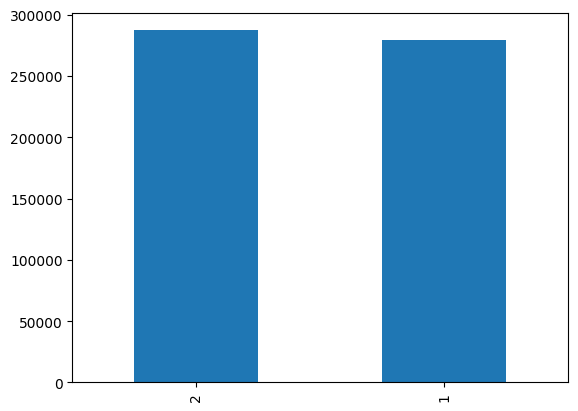

In [9]:

df["sex"].value_counts().plot.bar()

In [10]:
df['covid_res'].value_counts().to_frame()

,covid_res
2,279035
1,220657
3,66910


In [11]:
df['covid_res'].replace([1,2,3],[1,0,2],inplace=True)
df['covid_res'].value_counts().to_frame()

,covid_res
0,279035
1,220657
2,66910


Text(0.5, 1.0, 'Covid Result')

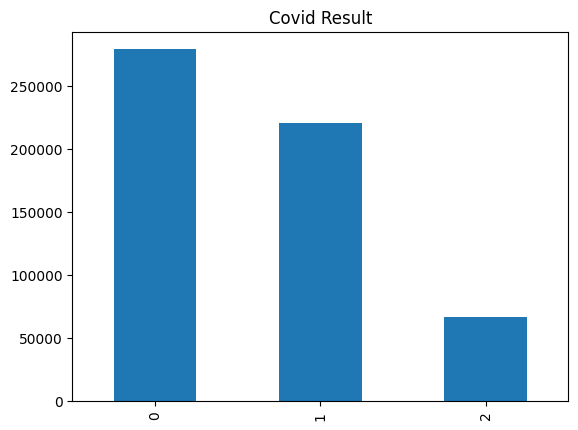

In [12]:
df['covid_res'].value_counts().sort_index().plot.bar()
plt.title('Covid Result')

In [13]:
df.rename(columns={'covid_res':'Chance'},inplace=True)
df.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,Chance,icu
0,2,1,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,2,1,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,1,2,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,2,2,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,1,2,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


In [14]:
df=df[df['Chance']!=2]

Text(0.5, 1.0, 'Chance')

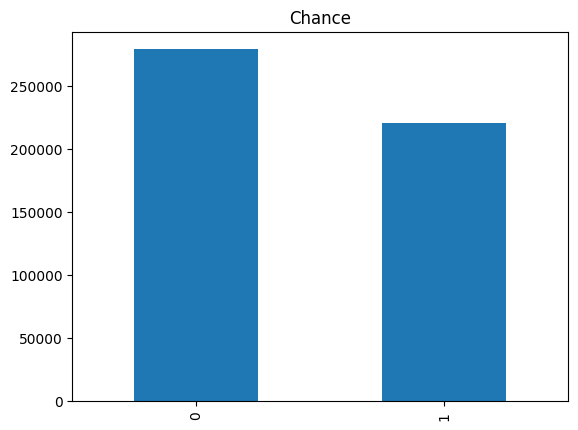

In [15]:
df['Chance'].value_counts().sort_index().plot.bar()
plt.title('Chance')

In [16]:
lst=df.columns
for i in range(19):
    print(df[lst[i]].value_counts().to_frame())
    print("----------------")

      sex
2  253098
1  246594
----------------
   patient_type
1        392146
2        107546
----------------
    intubed
97   392146
2     98321
1      9103
99      122
----------------
    pneumonia
2      420965
1       78716
99         11
----------------
       age
30   12872
31   12298
36   12292
38   12259
37   12248
..     ...
117      1
115      1
105      1
107      1
111      1

[120 rows x 1 columns]
----------------
    pregnancy
97     253098
2      241644
1        3614
98       1336
----------------
    diabetes
2     435702
1      62349
98      1641
----------------
      copd
2   489970
1     8276
98    1446
----------------
    asthma
2   482036
1    16214
98    1442
----------------
    inmsupr
2    489959
1      8071
98     1662
----------------
    hypertension
2         416863
1          81340
98          1489
----------------
    other_disease
2          482107
1           15392
98           2193
----------------
    cardiovascular
2           486764
1         

Text(0.5, 1.0, 'Intubed')

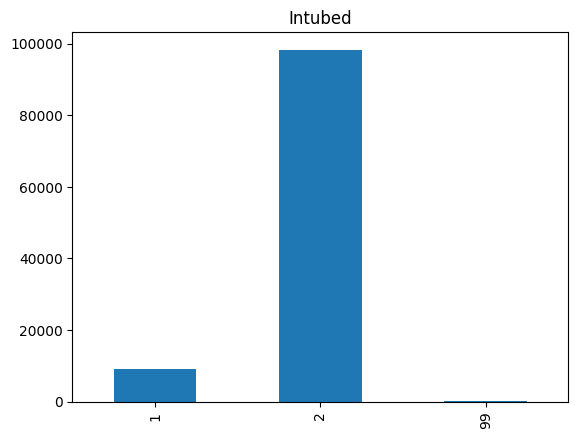

In [17]:
df=df[df['intubed']!=97]
df['intubed'].value_counts().sort_index().plot.bar()
plt.title('Intubed')

In [18]:
df=df[df['intubed']!=99]
df['intubed'].value_counts().to_frame()

,intubed
2,98321
1,9103


graphs of each dieasese

penumonia

Text(0.5, 1.0, 'pneumonia')

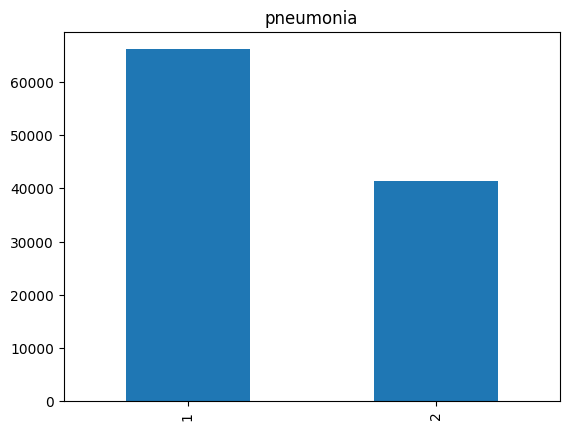

In [19]:
df=df[df['pneumonia']!=99]
df['pneumonia'].value_counts().sort_index().plot.bar()
plt.title('pneumonia')

pregency

Text(0.5, 1.0, 'Pregnancy')

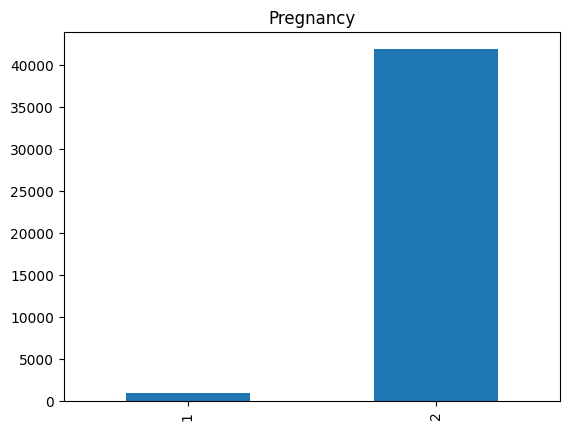

In [20]:
df=df[df['pregnancy']!=97]
df=df[df['pregnancy']!=98]
df['pregnancy'].value_counts().sort_index().plot.bar()
plt.title('Pregnancy')

diabetes

Text(0.5, 1.0, 'Diabetes')

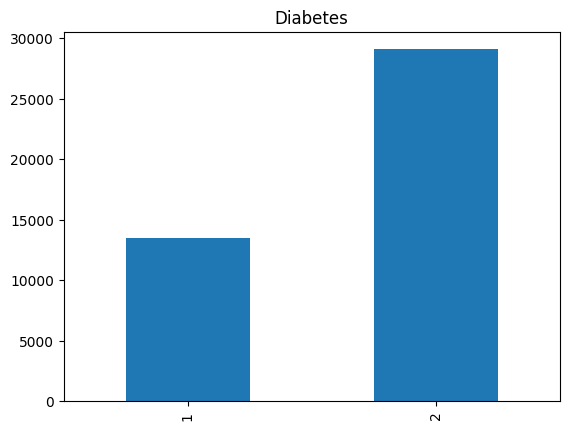

In [21]:
df=df[df['diabetes']!=98]
df['diabetes'].value_counts().sort_index().plot.bar()
plt.title('Diabetes')

copd

Text(0.5, 1.0, 'COPD')

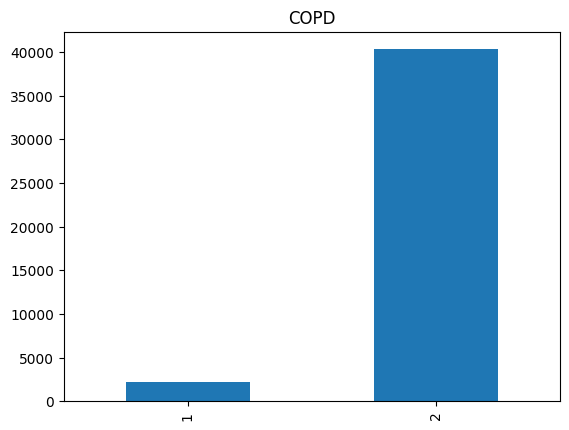

In [22]:
df=df[df['copd']!=98]
df['copd'].value_counts().sort_index().plot.bar()
plt.title('COPD')

asthama

Text(0.5, 1.0, 'Asthma')

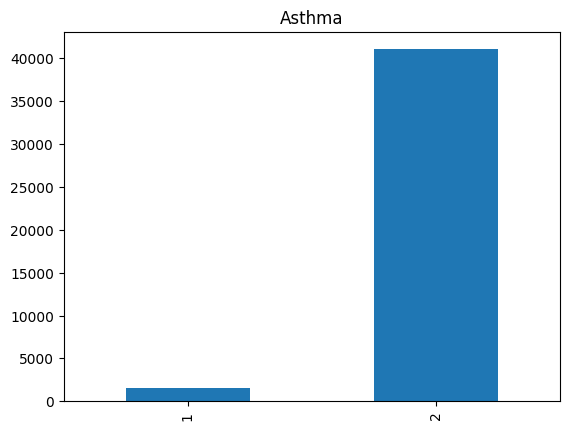

In [23]:
df=df[df['asthma']!=98]
df['asthma'].value_counts().sort_index().plot.bar()
plt.title('Asthma')

inmuspsr

Text(0.5, 1.0, 'Inmsupr')

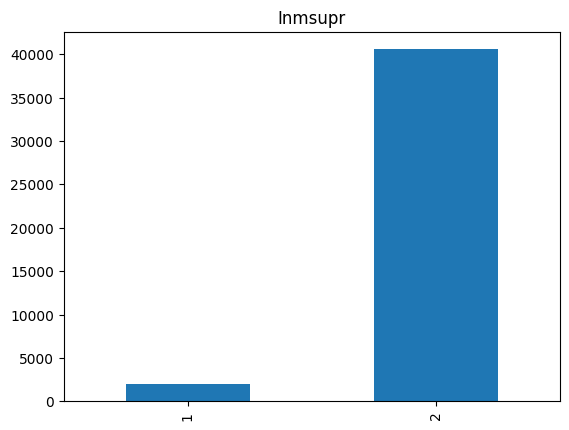

In [24]:
df=df[df['inmsupr']!=98]
df['inmsupr'].value_counts().sort_index().plot.bar()
plt.title('Inmsupr')

hypertension

Text(0.5, 1.0, 'Hypertension')

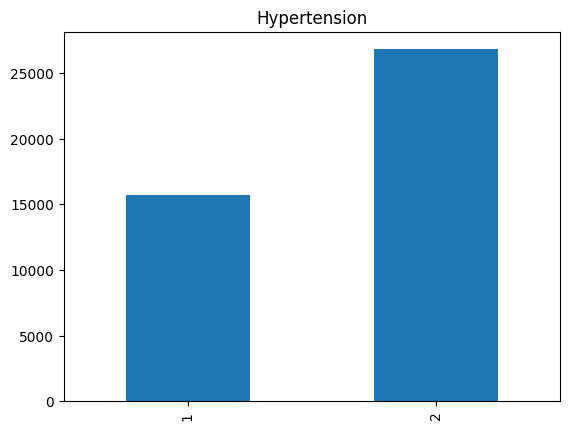

In [25]:
df=df[df['hypertension']!=98]
df['hypertension'].value_counts().sort_index().plot.bar()
plt.title('Hypertension')

other disease

Text(0.5, 1.0, 'Other Disease')

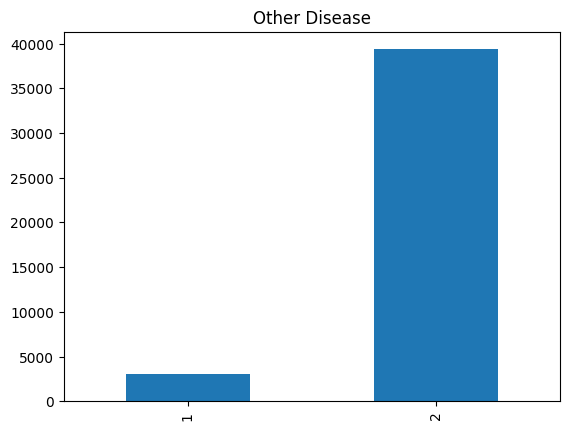

In [26]:
df=df[df['other_disease']!=98]
df['other_disease'].value_counts().sort_index().plot.bar()
plt.title('Other Disease')

cardiovascular

Text(0.5, 1.0, 'Cardiovascular')

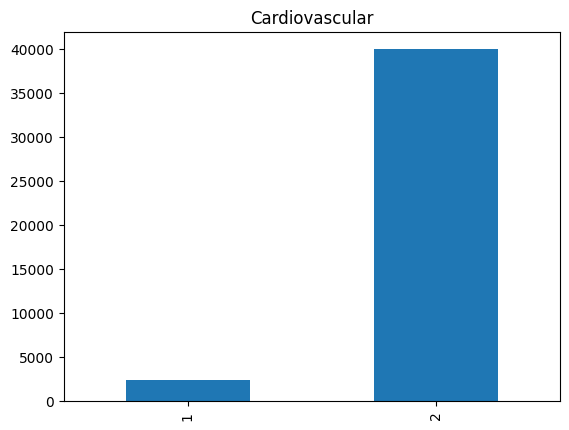

In [27]:
df=df[df['cardiovascular']!=98]
df['cardiovascular'].value_counts().sort_index().plot.bar()
plt.title('Cardiovascular')

obesity

Text(0.5, 1.0, 'Obesity')

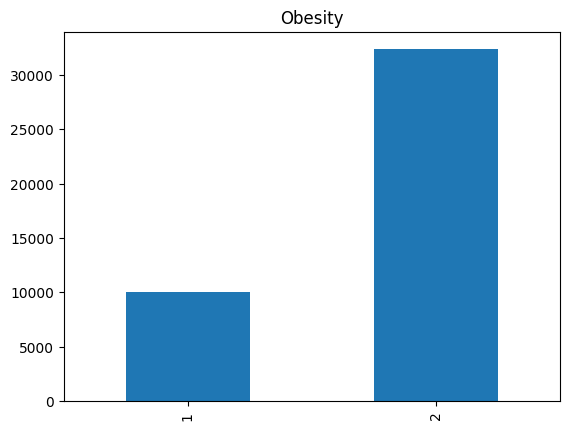

In [28]:
df=df[df['obesity']!=98]
df['obesity'].value_counts().sort_index().plot.bar()
plt.title('Obesity')

renal chronic

Text(0.5, 1.0, 'Renal Chronic')

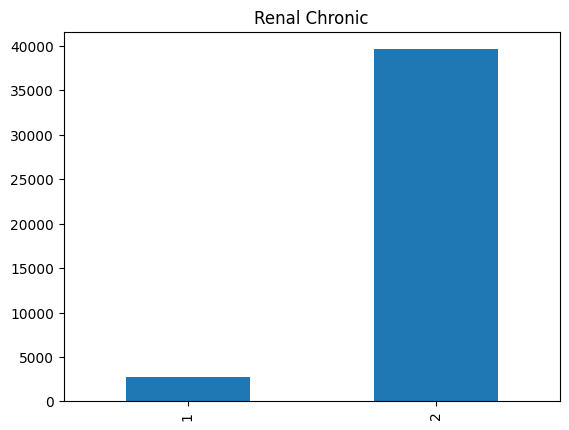

In [29]:
df=df[df['renal_chronic']!=98]
df['renal_chronic'].value_counts().sort_index().plot.bar()
plt.title('Renal Chronic')

tobacco

2    40303
1     1988
Name: tobacco, dtype: int64


Text(0.5, 1.0, 'Tobacco')

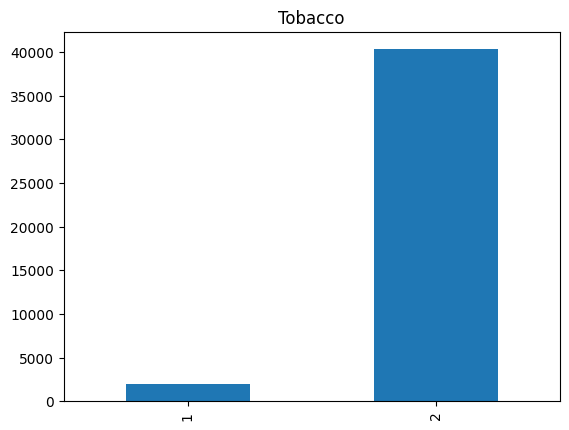

In [30]:
df=df[df['tobacco']!=98]
print(df['tobacco'].value_counts())
df['tobacco'].value_counts().sort_index().plot.bar()
plt.title('Tobacco')

covid

Text(0.5, 1.0, 'Contact other covid')

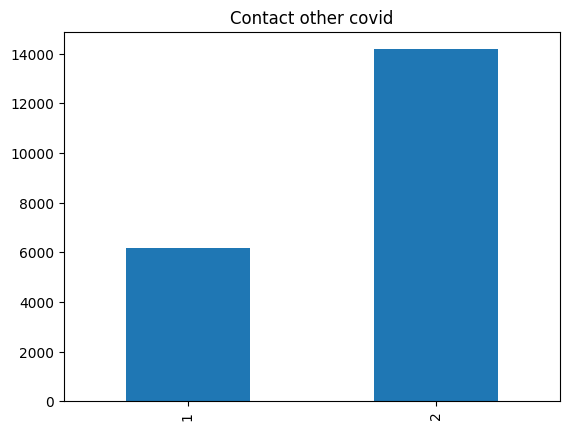

In [31]:
df=df[df['contact_other_covid']!=99]
df['contact_other_covid'].value_counts().sort_index().plot.bar()
plt.title('Contact other covid')

icu


Text(0.5, 1.0, 'ICU')

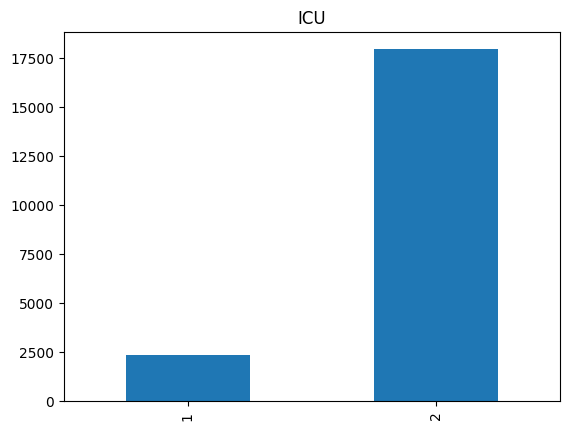

In [32]:
df=df[df['icu']!=99]
df=df[df['icu']!=97]

df['icu'].value_counts().sort_index().plot.bar()
plt.title('ICU')

In [33]:
df.reset_index(drop=True,inplace=True)
df.head(10)

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,Chance,icu
0,1,2,2,2,25,2,2,2,2,2,2,2,2,2,2,2,1,1,2
1,1,2,2,2,52,2,2,2,2,2,2,2,2,1,2,1,1,1,2
2,1,2,2,1,51,2,2,2,2,2,2,2,2,2,2,2,1,1,2
3,1,2,1,1,67,2,1,2,2,2,1,2,2,1,2,2,1,1,2
4,1,2,2,1,59,2,1,2,2,2,2,2,2,2,2,2,1,1,2
5,1,2,2,2,52,2,1,2,2,2,1,2,1,2,2,2,2,1,2
6,1,2,2,1,54,2,2,2,2,2,2,2,2,2,2,2,2,1,2
7,1,2,2,1,78,2,2,2,2,2,1,2,2,1,2,2,1,1,1
8,1,2,2,1,80,2,1,2,2,2,1,2,2,1,2,2,1,1,2
9,1,2,2,2,40,2,2,2,2,2,2,2,2,2,2,2,2,1,2


heat map

Text(0.5, 1.0, 'Correlation heatmap')

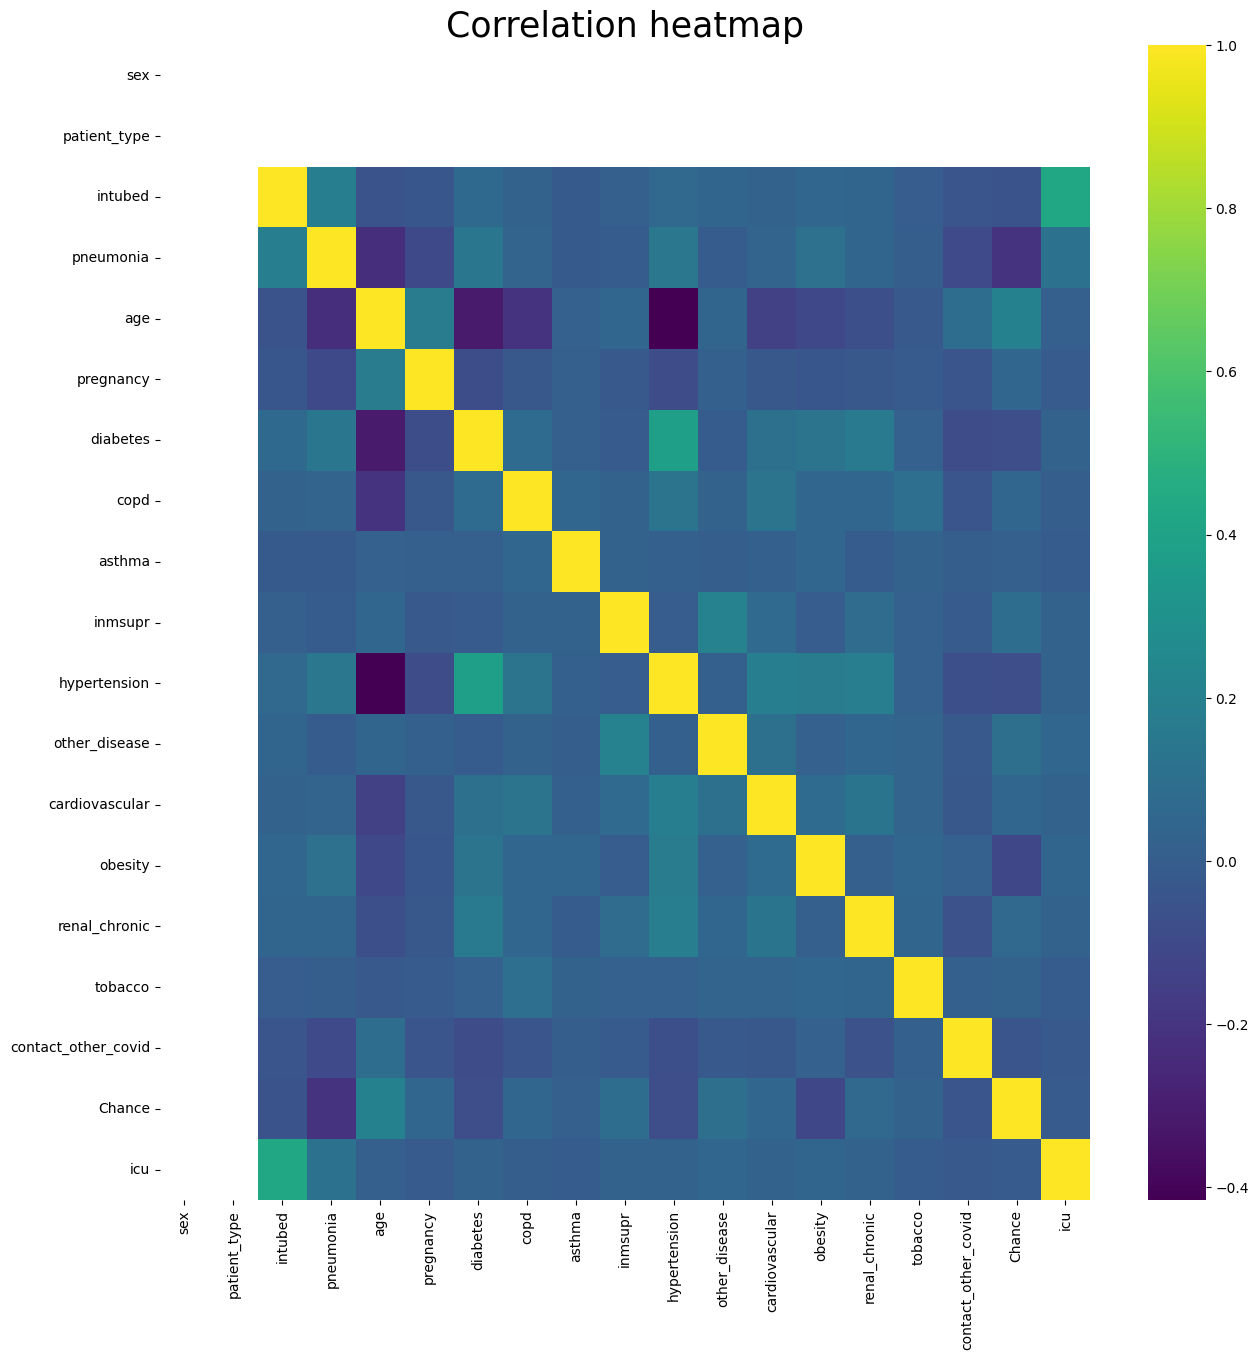

In [34]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cmap='viridis')
plt.title('Correlation heatmap',size=25)

Text(5.069444444444445, 0.5, 'Count')

<Figure size 2000x2000 with 0 Axes>

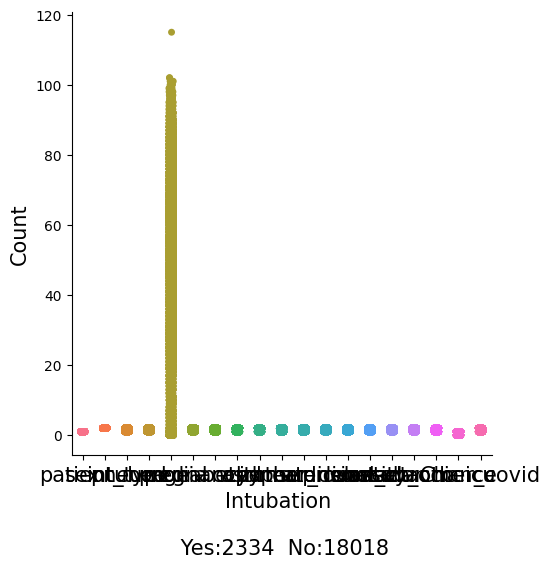

In [35]:
plt.figure(figsize=(20,20))
sns.catplot(df)
plt.xticks(size=15,)
plt.xlabel('Intubation \n \n Yes:{}  No:{}'.format(df['intubed'].value_counts()[1] , df['intubed'].value_counts()[2]),size=15)
plt.ylabel('Count',size=15)

In [36]:
features=['sex', 'patient_type', 'intubed', 'pneumonia', 'age', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'icu']
list(enumerate(features))

[(0, 'sex'),
 (1, 'patient_type'),
 (2, 'intubed'),
 (3, 'pneumonia'),
 (4, 'age'),
 (5, 'pregnancy'),
 (6, 'diabetes'),
 (7, 'copd'),
 (8, 'asthma'),
 (9, 'inmsupr'),
 (10, 'hypertension'),
 (11, 'other_disease'),
 (12, 'cardiovascular'),
 (13, 'obesity'),
 (14, 'renal_chronic'),
 (15, 'tobacco'),
 (16, 'contact_other_covid'),
 (17, 'icu')]

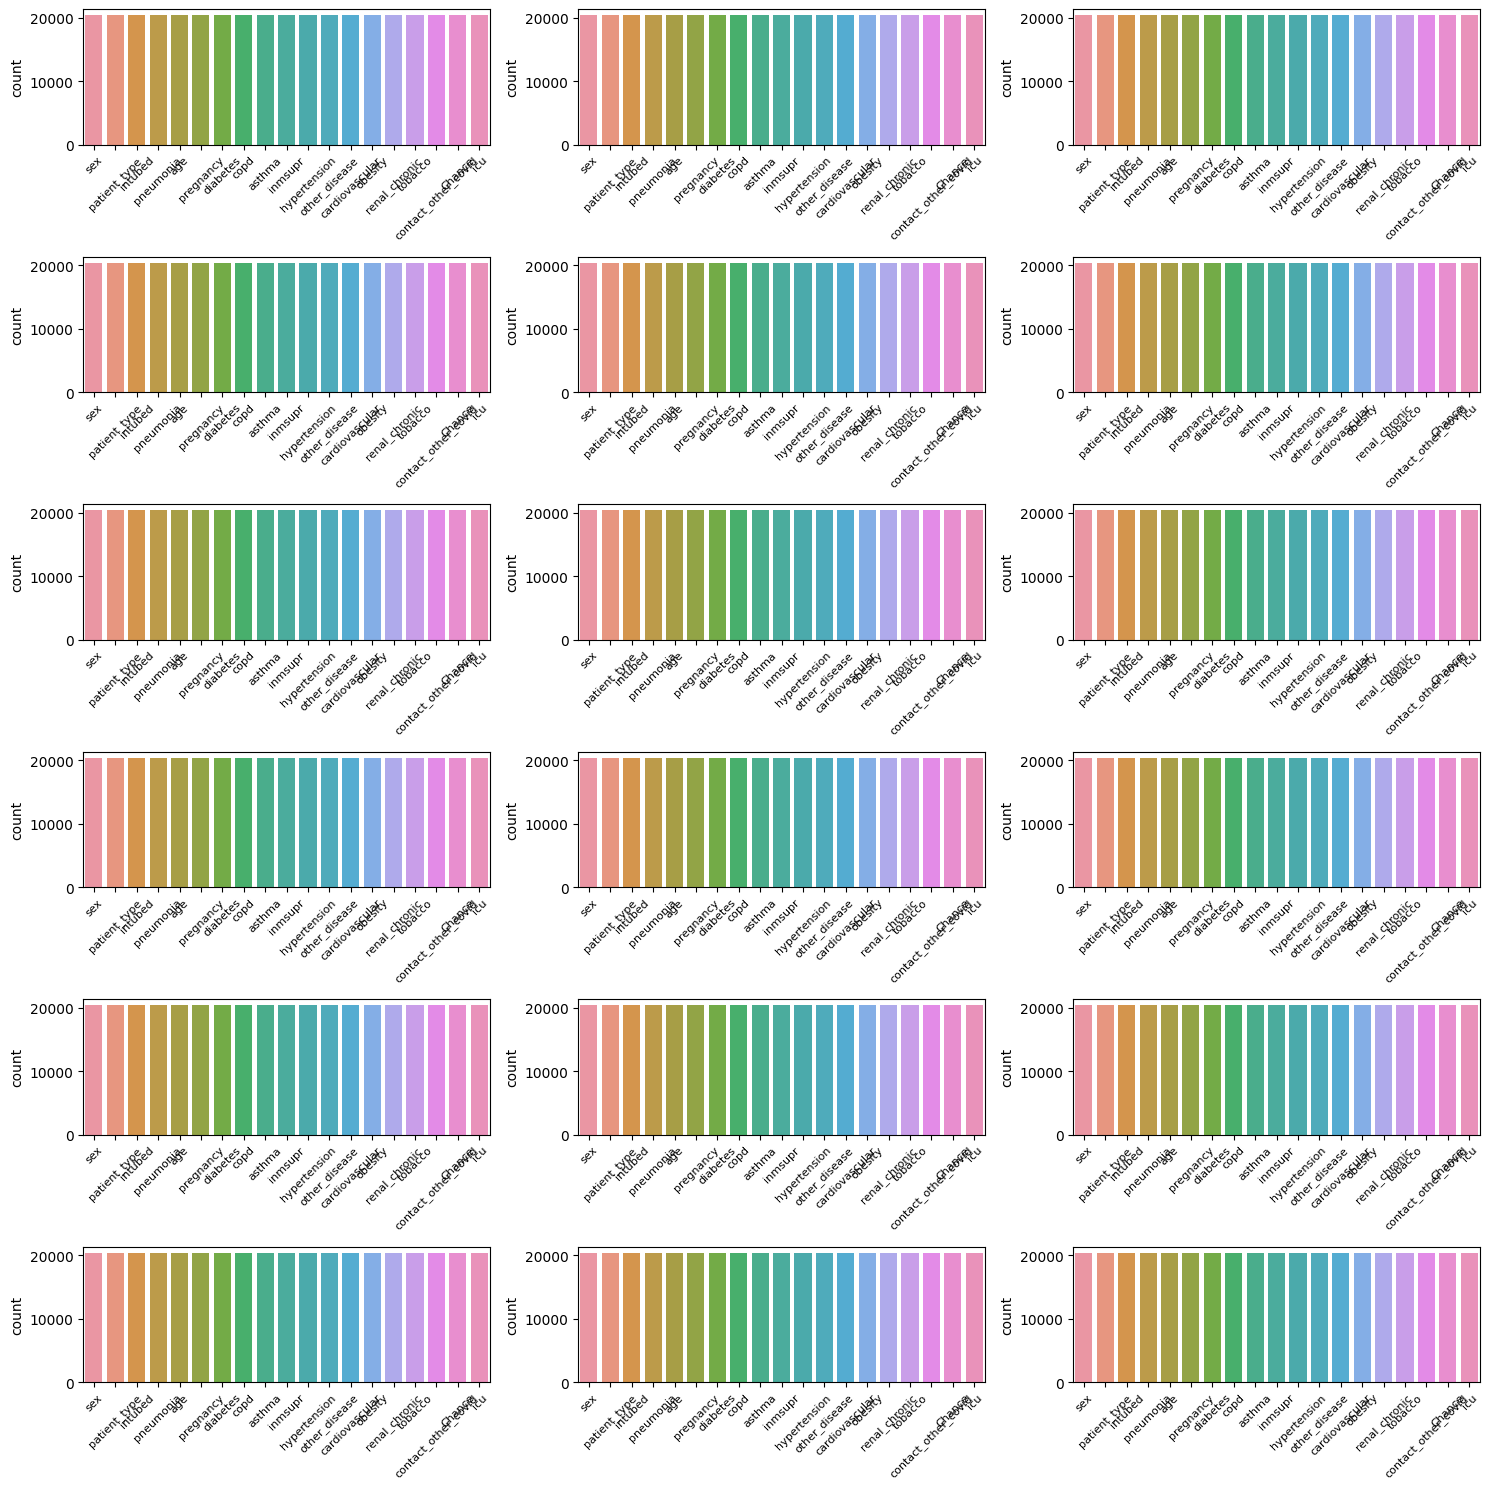

In [37]:
plt.figure(figsize=(15,15))
for i in enumerate(features):
    plt.subplot(6,3,i[0]+1)
    sns.countplot(df)
    plt.xticks(rotation=45,size=8)
    plt.tight_layout()               
                  

In [38]:
train=df[['sex', 'patient_type', 'intubed', 'pneumonia', 'age', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'icu']]

In [39]:
test=df['Chance']
train=train.values
test=np.array(test)

Size of model

In [40]:
x_train,x_test,y_train,y_test=train_test_split(train,test,test_size=0.2,random_state=42,stratify=test)
print("Size of X_train is:{}\nSize of Y_train is:{}\nSize of X_test is:{}\nSize of Y_test is:{}\n".format(x_train.shape,
                                      y_train.shape,
                                      x_test.shape,
                                      y_test.shape
                                      ))

Size of X_train is:(16281, 18)
Size of Y_train is:(16281,)
Size of X_test is:(4071, 18)
Size of Y_test is:(4071,)



In [41]:
acc=[]

Kneigber classifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

for i in range(1,25):
    
    neigh=KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    KNN_score=metrics.accuracy_score(y_test, yhat)
    print("Train set Accuracy at {} is {}  ".format(i,metrics.accuracy_score(y_train, neigh.predict(x_train))))
    print("Test set Accuracy at {} is {}".format(i,KNN_score))
    print("\n")

Train set Accuracy at 1 is 0.7511209385172901  
Test set Accuracy at 1 is 0.5836403831982314


Train set Accuracy at 2 is 0.6785209753700633  
Test set Accuracy at 2 is 0.5465487595185458


Train set Accuracy at 3 is 0.7219458264234384  
Test set Accuracy at 3 is 0.6059936133628101


Train set Accuracy at 4 is 0.6920950801547816  
Test set Accuracy at 4 is 0.5848685826578236


Train set Accuracy at 5 is 0.7024138566427124  
Test set Accuracy at 5 is 0.620732006877917


Train set Accuracy at 6 is 0.6932620846385357  
Test set Accuracy at 6 is 0.5996069761729305


Train set Accuracy at 7 is 0.698605736748357  
Test set Accuracy at 7 is 0.6359616801768607


Train set Accuracy at 8 is 0.6936920336588661  
Test set Accuracy at 8 is 0.6231884057971014


Train set Accuracy at 9 is 0.694551931699527  
Test set Accuracy at 9 is 0.6433308769344142


Train set Accuracy at 10 is 0.6942448252564338  
Test set Accuracy at 10 is 0.632768361581921


Train set Accuracy at 11 is 0.693200663349917  
Test

In [43]:
acc.append(0.6290)

In [44]:
for i in range(1,25):
    drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    drugTree.fit(x_train,y_train)
    predTree = drugTree.predict(x_test)
    decisionTree_score=metrics.accuracy_score(y_test, predTree)
    print("DecisionTrees's Accuracy at {} is {}\n".format(i,metrics.accuracy_score(y_test, predTree)))

DecisionTrees's Accuracy at 1 is 0.6408744780152297

DecisionTrees's Accuracy at 2 is 0.6408744780152297

DecisionTrees's Accuracy at 3 is 0.6443134365020879

DecisionTrees's Accuracy at 4 is 0.6475067550970277

DecisionTrees's Accuracy at 5 is 0.6575779906656841

DecisionTrees's Accuracy at 6 is 0.6548759518545811

DecisionTrees's Accuracy at 7 is 0.653647752394989

DecisionTrees's Accuracy at 8 is 0.6590518300171948

DecisionTrees's Accuracy at 9 is 0.6565954310980103

DecisionTrees's Accuracy at 10 is 0.6570867108818472

DecisionTrees's Accuracy at 11 is 0.6507000736919676

DecisionTrees's Accuracy at 12 is 0.6502087939081307

DecisionTrees's Accuracy at 13 is 0.6430852370424956

DecisionTrees's Accuracy at 14 is 0.6443134365020879

DecisionTrees's Accuracy at 15 is 0.6457872758535986

DecisionTrees's Accuracy at 16 is 0.6379267993122083

DecisionTrees's Accuracy at 17 is 0.6335052812576762

DecisionTrees's Accuracy at 18 is 0.6244166052566937

DecisionTrees's Accuracy at 19 is 0.62

In [45]:
acc.append(0.6401)

Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=0.03, solver='liblinear')
LR.fit(x_train,y_train)
yhat = LR.predict(x_test)
yhat_prob = LR.predict_proba(x_test)
logReg_score=metrics.accuracy_score(y_test, yhat)
print("LogisticRegression's Accuracy:{0}".format(metrics.accuracy_score(y_test, yhat)))

LogisticRegression's Accuracy:0.6590518300171948


In [47]:
acc.append(logReg_score)

In [48]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train) 
yhat = clf.predict(x_test)
svm_score=metrics.accuracy_score(y_test, yhat)
print("SVM's Accuracy:{0}".format(metrics.accuracy_score(y_test, yhat)))

SVM's Accuracy:0.6452959960697617


In [49]:
acc.append(svm_score)

In [50]:
from sklearn.ensemble import RandomForestClassifier
Random_forest = RandomForestClassifier(n_estimators=50)
Random_forest.fit(x_train,y_train)
randomForest_predict = Random_forest.predict(x_test)
randomForest_score = metrics.accuracy_score(y_test, randomForest_predict)
print("Random Forest Score :",randomForest_score)

Random Forest Score : 0.620732006877917


In [51]:
acc.append(randomForest_score)

Prediction

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier(random_state=100, n_estimators=150,min_samples_split=100, max_depth=6)
gbk.fit(x_train, y_train)
gbk_predict = gbk.predict(x_test)
gbk_score = gbk.score(x_test,y_test)
#print("Gradient Boosting Prediction :",gbk_predict)
print("Gradient Boosting Score :",gbk_score)

Gradient Boosting Score : 0.660280029476787


In [53]:
acc.append(gbk_score)
algo_name=['KNN','Decision Tree','Logistic Regression','SVM','Random Forest','Gradient Boosting']
acc=np.array(acc)

Text(0, 0.5, 'Accuracy')

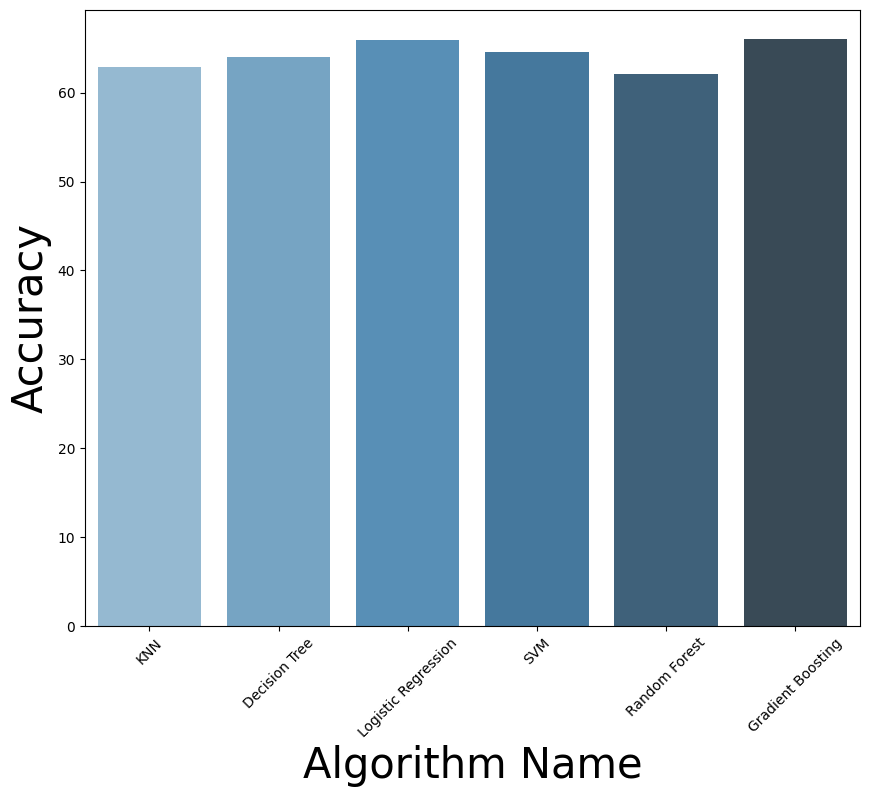

In [54]:
from numpy import median
plt.figure(figsize=(10,8))
sns.barplot(y=acc*100,x=algo_name,estimator=median,palette="Blues_d")
plt.xlabel('Algorithm Name',size=30)
plt.xticks(rotation=45)
plt.ylabel('Accuracy',size=30)